### Day 17 Logistic Regression Lab 

## Aggressive Regression on Aggression

In [415]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import seaborn as sns

from sklearn import neighbors

from matplotlib.colors import ListedColormap

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import cross_val_score, StratifiedKFold
from sklearn.grid_search import GridSearchCV

import imp
plotter = imp.load_source('plotter', '/Users/ga/Desktop/DSI-SF-3_repo/DSI-SF-3/utils/plotting/knn_plotter.py')
from plotter import KNNBoundaryPlotter

In [416]:
hsq = pd.read_csv('/Users/ga/Desktop/DSI-SF-3_repo/DSI-SF-3/datasets/humor_styles/hsq_data.csv')

In [417]:
hsq.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q30,Q31,Q32,affiliative,selfenhancing,agressive,selfdefeating,age,gender,accuracy
0,2,2,3,1,4,5,4,3,4,3,...,4,2,2,4.0,3.5,3.0,2.3,25,2,100
1,2,3,2,2,4,4,4,3,4,3,...,4,3,1,3.3,3.5,3.3,2.4,44,2,90
2,3,4,3,3,4,4,3,1,2,4,...,5,4,2,3.9,3.9,3.1,2.3,50,1,75
3,3,3,3,4,3,5,4,3,-1,4,...,5,3,3,3.6,4.0,2.9,3.3,30,2,85
4,1,4,2,2,3,5,4,1,4,4,...,5,4,2,4.1,4.1,2.9,2.0,52,1,80


In [418]:
hsq = hsq[hsq["age"] <= 100]
hsq = hsq[hsq["gender"].isin([1,2])]

In [419]:

X = hsq.iloc[:, 0:31]
y = hsq[["agressive"]]

X_norm = X - X.mean()
hsq["agressive"] = hsq["agressive"].map(lambda x: 1 if x > 3 else 0)
y = hsq["agressive"]

In [420]:
from sklearn.cross_validation import StratifiedKFold

knn_uni_n3 = KNeighborsClassifier(n_neighbors=3, weights='uniform')
knn_uni_n3.fit(X_norm, y)

cv_indices = StratifiedKFold(y, n_folds=5)

# Function to crossvalidate accuracy of a knn model acros folds
def accuracy_crossvalidator(X_norm, y, knn, cv_indices):
    
    scores = []
    for train_i, test_i in cv_indices:
    
        X_train = X_norm.iloc[train_i, :]
        X_test = X_norm.iloc[test_i, :]

        y_train = y.iloc[train_i]
        y_test = y.iloc[test_i]

        knn.fit(X_train, y_train)
        
        acc = knn.score(X_test, y_test)
        scores.append(acc)
        
        print('Fold accuracy:', acc)
        
    print('Mean CV accuracy:', np.mean(scores))
    
accuracy_crossvalidator(X, y, knn_uni_n3, cv_indices)

('Fold accuracy:', 0.7345971563981043)
('Fold accuracy:', 0.75829383886255919)
('Fold accuracy:', 0.74407582938388628)
('Fold accuracy:', 0.70616113744075826)
('Fold accuracy:', 0.6872037914691943)
('Mean CV accuracy:', 0.72606635071090042)


In [421]:

knn_uni_n7 = KNeighborsClassifier(n_neighbors=7, weights='uniform')
knn_uni_n7.fit(X_norm, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')

In [422]:

accuracy_crossvalidator(X_norm, y, knn_uni_n7, cv_indices)

('Fold accuracy:', 0.75355450236966826)
('Fold accuracy:', 0.80568720379146919)
('Fold accuracy:', 0.74407582938388628)
('Fold accuracy:', 0.71563981042654023)
('Fold accuracy:', 0.72511848341232232)
('Mean CV accuracy:', 0.74881516587677721)


In [423]:
knn_dist_n11 = KNeighborsClassifier(n_neighbors=11, weights='distance')
knn_dist_n11.fit(X_norm, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=11, p=2,
           weights='distance')

In [424]:

accuracy_crossvalidator(X_norm, y, knn_dist_n11, cv_indices)


('Fold accuracy:', 0.74407582938388628)
('Fold accuracy:', 0.80568720379146919)
('Fold accuracy:', 0.75355450236966826)
('Fold accuracy:', 0.76303317535545023)
('Fold accuracy:', 0.73933649289099523)
('Mean CV accuracy:', 0.76113744075829382)


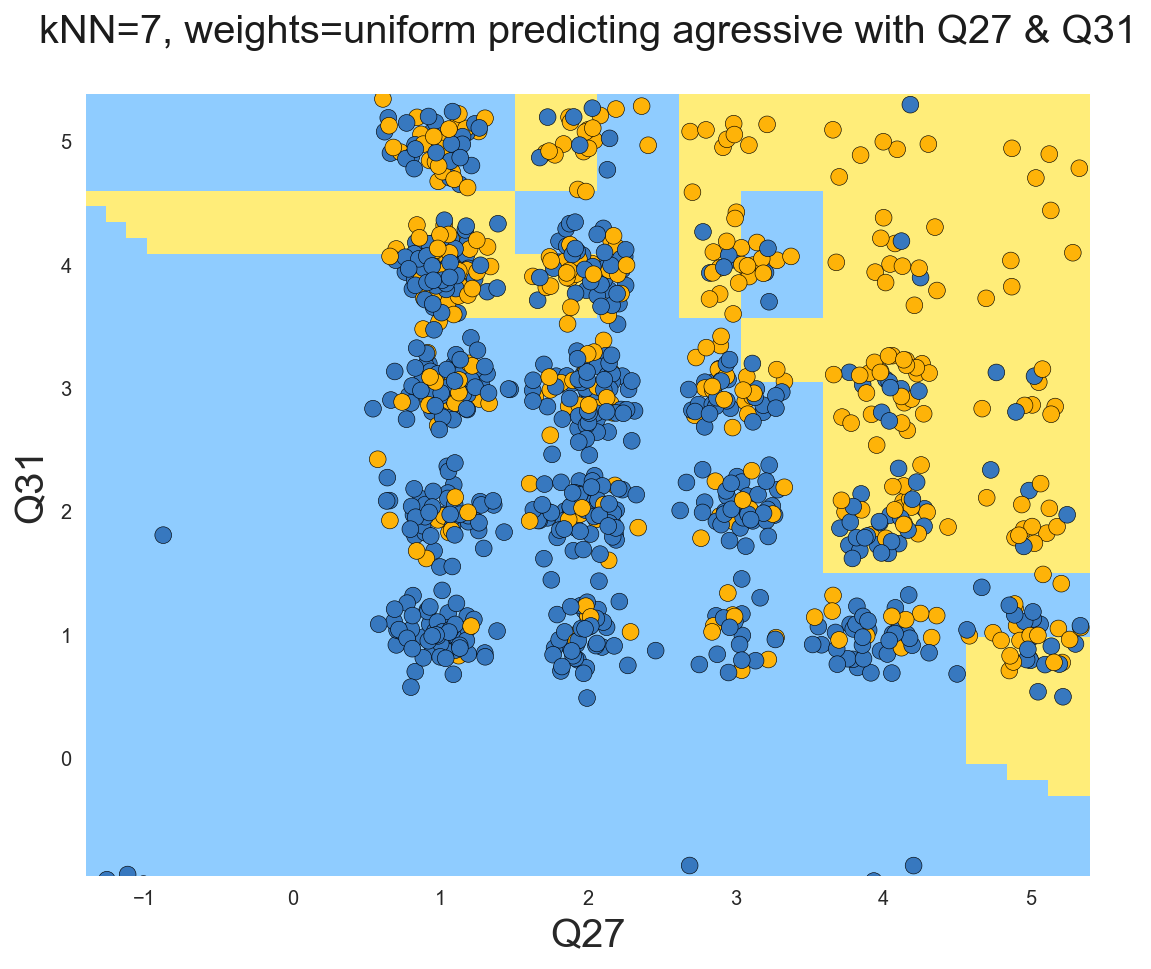

In [469]:

kbp = KNNBoundaryPlotter(hsq, 'Q27', 'Q31',
                         'agressive', nn_range=range(1,26))
kbp.knn_mesh_runner()
kbp.knn_interact()

In [426]:

logreg = LogisticRegression()
logreg.fit(X_norm, y)

print 'Logreg intercept:', logreg.intercept_
print 'Logreg coef(s):', logreg.coef_
print 'Logreg predicted probabilities:', logreg.predict_proba(X.iloc[0:10,:])

Logreg intercept: [-3.04028263]
Logreg coef(s): [[ 0.00345634 -0.09675056  2.89527752  0.06401559 -0.00490474 -0.06287985
   2.9573252   0.0168671   0.01645283  0.05718318  3.09164296 -0.16514048
  -0.08408227  0.07504814  2.88489021 -0.14353853 -0.07235477 -0.04316626
   3.02025377 -0.11656375 -0.04447496  0.11052719  2.97095597  0.07992989
  -0.06446672  0.10518051  3.06679272  0.01269682 -0.04382399  0.06395053
   3.13441781]]
Logreg predicted probabilities: [[ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]]


In [427]:
#accuracy for log
cv_indices = StratifiedKFold(y, n_folds=5)
accuracy_crossvalidator(X_norm, y, logreg, cv_indices)

('Fold accuracy:', 0.98578199052132698)
('Fold accuracy:', 1.0)
('Fold accuracy:', 1.0)
('Fold accuracy:', 0.99526066350710896)
('Fold accuracy:', 1.0)
('Mean CV accuracy:', 0.99620853080568705)


In [428]:
# accuracy for L2 ridge
log_ridge = LogisticRegression(penalty="l2")
log_ridge.fit(X_norm, y)
cv_indices = StratifiedKFold(y, n_folds=5)
accuracy_crossvalidator(X_norm, y, log_ridge, cv_indices)

('Fold accuracy:', 0.98578199052132698)
('Fold accuracy:', 1.0)
('Fold accuracy:', 1.0)
('Fold accuracy:', 0.99526066350710896)
('Fold accuracy:', 1.0)
('Mean CV accuracy:', 0.99620853080568705)


In [470]:
# accuracy for L1 lasso
log_lasso = LogisticRegression(penalty="l1", solver="liblinear")
log_lasso.fit(X_norm, y)
cv_indices = StratifiedKFold(y, n_folds=5)
accuracy_crossvalidator(X_norm, y, log_lasso, cv_indices)

print 'Loglasso intercept:', log_lasso.intercept_
print 'Loglasso coef(s):', log_lasso.coef_

('Fold accuracy:', 1.0)
('Fold accuracy:', 1.0)
('Fold accuracy:', 1.0)
('Fold accuracy:', 1.0)
('Fold accuracy:', 1.0)
('Mean CV accuracy:', 1.0)
Loglasso intercept: [-4.68874306]
Loglasso coef(s): [[ 0.         -0.04264745  4.61940811  0.          0.          0.
   4.66720821  0.          0.          0.          4.71481152 -0.07608631
   0.          0.          4.53069735 -0.09607309  0.         -0.0184754
   4.78078039 -0.01021626  0.          0.10421933  4.6996655   0.03613139
   0.          0.06588607  4.73925804  0.          0.          0.01059381
   4.82617988]]


In [430]:
log_nonreg_center = LogisticRegression(C=1e10)
log_nonreg_center.fit(X_norm, y)

LogisticRegression(C=10000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [431]:
print 'Log_nonreg_center intercept:', log_nonreg_center.intercept_
print 'Log_nonreg_center coef(s):', log_nonreg_center.coef_
print 'Log_nonreg_center predicted probabilities:', log_nonreg_center.predict_proba(X.iloc[0:10,:])

cv_indices = StratifiedKFold(y, n_folds=5)
accuracy_crossvalidator(X_norm, y, log_nonreg_center, cv_indices)

Log_nonreg_center intercept: [-15.68779573]
Log_nonreg_center coef(s): [[ -3.43048479e-02  -1.02562304e-01   1.57027011e+01   8.75406250e-02
   -2.77306954e-02  -5.13235277e-02   1.57800806e+01  -3.51946634e-04
   -1.38741293e-02   6.67132808e-02   1.58483253e+01  -1.71437537e-01
   -4.02363397e-02   2.91232977e-02   1.56992091e+01  -1.46178218e-01
   -7.93531747e-02  -5.06653273e-02   1.58307779e+01  -1.23390163e-01
   -5.08092914e-02   9.74139077e-02   1.57694477e+01   5.46118099e-02
   -4.85364478e-02   1.00552385e-01   1.59013673e+01   2.44878059e-03
   -1.11330507e-02   4.79545896e-02   1.59155306e+01]]
Log_nonreg_center predicted probabilities: [[ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]]
('Fold accuracy:', 1.0)
('Fold accuracy:', 1.0)
('Fold accuracy:', 1.0)
('Fold accuracy:', 1.0)
('Fold accuracy:', 1.0)
('Mean CV accuracy:', 1.0)


In [432]:
# predictors is an array of values -1 to 5
def logistic_transf(predictor, model, i):
    regression_sum = model.intercept_[0] + model.coef_[0].dot(predictors)
    exponentiated = np.exp(regression_sum)
    return exponentiated / (1 + exponentiated)

In [442]:
predictors = np.random.randint(6, size=31)
print predictors
logistic_transf(predictors, log_nonreg_center, 2)

[2 0 1 0 3 4 2 5 2 2 0 2 3 5 0 2 5 1 4 4 2 2 0 1 4 2 2 1 2 1 3]


1.0

In [449]:
logistic_transf(predictors, logreg, 2)

0.99999999999993283

<function matplotlib.pyplot.show>

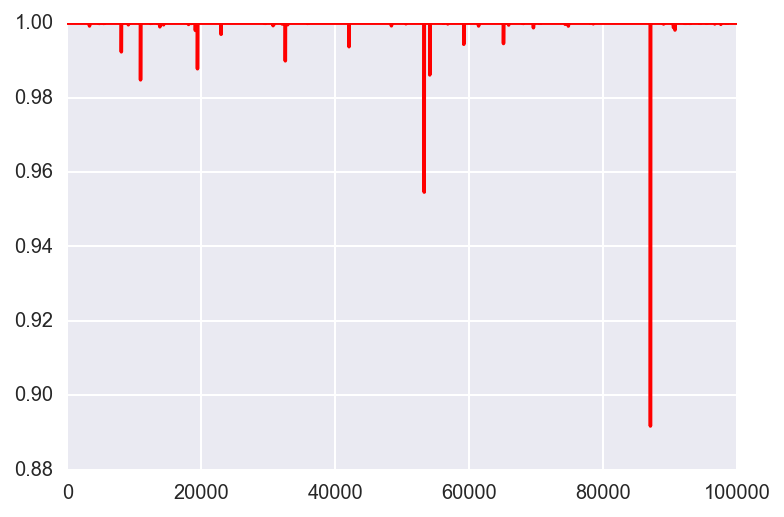

In [465]:
sns.set_style("darkgrid", {"text.color": ".1"})

'''
def plot_that_shit(iters, model):
    i_range = np.arange(0, iters, 1)
    out = []
    for i in i_range:
        predictors = np.random.randint(6, size=31)
        out.append(logistic_transf(predictors, model, i))
    plt.plot(i_range, out, 'r')
    plt.axis([0, iters, 0.90, 1.01])
    plt.show()

plot_that_shit(10000, logreg)
'''

out = []
i_range = np.arange(0, 100000, 1)
for i in i_range:
    predictors = np.random.randint(6, size = 31)
    out.append(logistic_transf(predictors, logreg, i))

plt.plot(i_range, out, "r-")
plt.show
# LOG REG

<function matplotlib.pyplot.show>

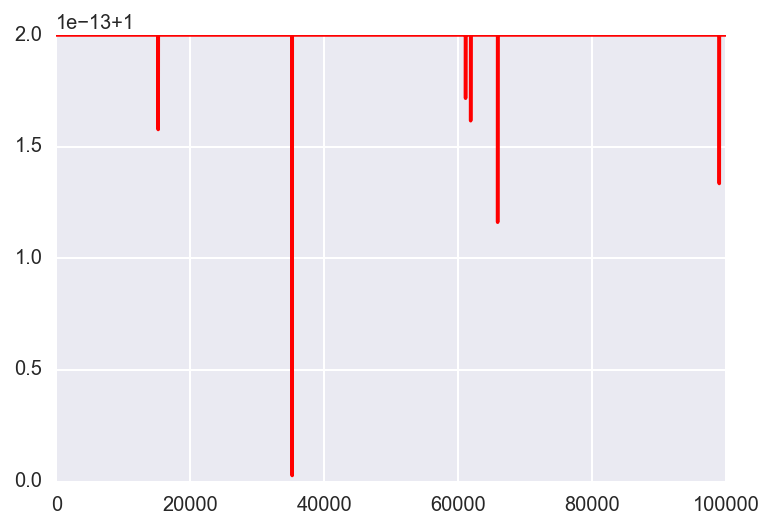

In [466]:
out = []
i_range = np.arange(0, 100000, 1)
for i in i_range:
    predictors = np.random.randint(6, size = 31)
    out.append(logistic_transf(predictors, log_nonreg_center, i))

plt.plot(i_range, out, "r-")
plt.show

# LOG NONREGULARIZED BUT CENTERED

<function matplotlib.pyplot.show>

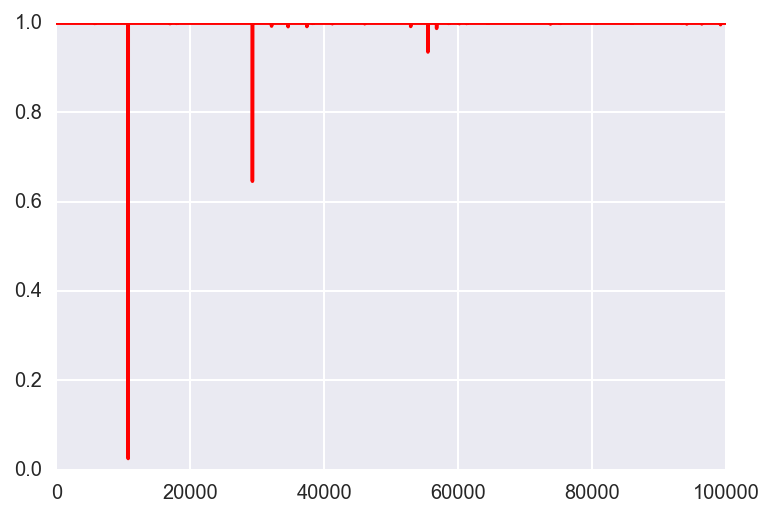

In [467]:
out = []
i_range = np.arange(0, 100000, 1)
for i in i_range:
    predictors = np.random.randint(6, size = 31)
    out.append(logistic_transf(predictors, log_ridge, i))

plt.plot(i_range, out, "r-")
plt.show

# LOG RIDGE

<function matplotlib.pyplot.show>

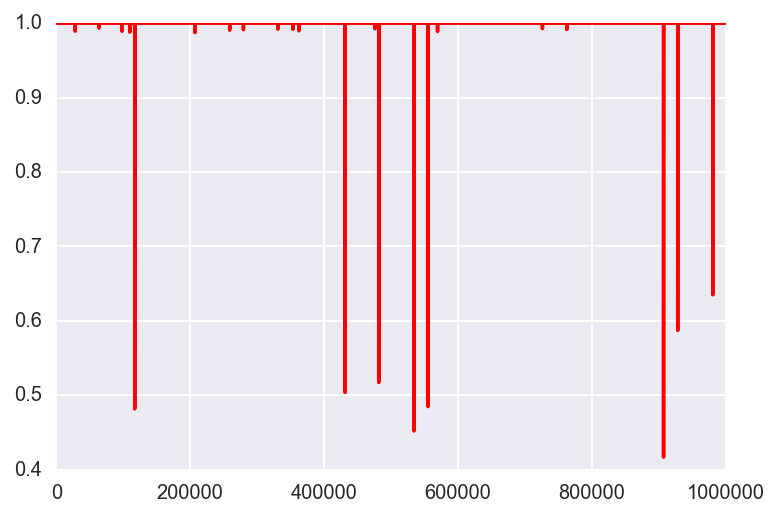

In [475]:
out = []
i_range = np.arange(0, 1000000, 1)
for i in i_range:
    predictors = np.random.randint(6, size = 31)
    out.append(logistic_transf(predictors, log_lasso, i))

plt.plot(i_range, out, "r-")
plt.show

#LOG LASSO

In [411]:
# NOTE
# aggressivess is measured by:
# Agg = SUM(Q_i)_{i = 3 mod 4} / 8 

#aggressive = round(($_POST['Q3']+ 
#                    $_POST['Q7'] + 
#                    $_POST['Q11'] + 
#                    $_POST['Q15'] + 
#                    $_POST['Q19'] + 
#                    $_POST['Q23'] + 
#                    $_POST['Q27'] + 
#                    $_POST['Q31'])/8,1);

# NOTE

# It seems Lasso predicts the best because it is in line with the linear
# relationship among the aggressive equation, whereas Ridge does equally
# as well as normal logistic regression




Computing regularization path ...
('This took ', datetime.timedelta(0, 1, 9257))


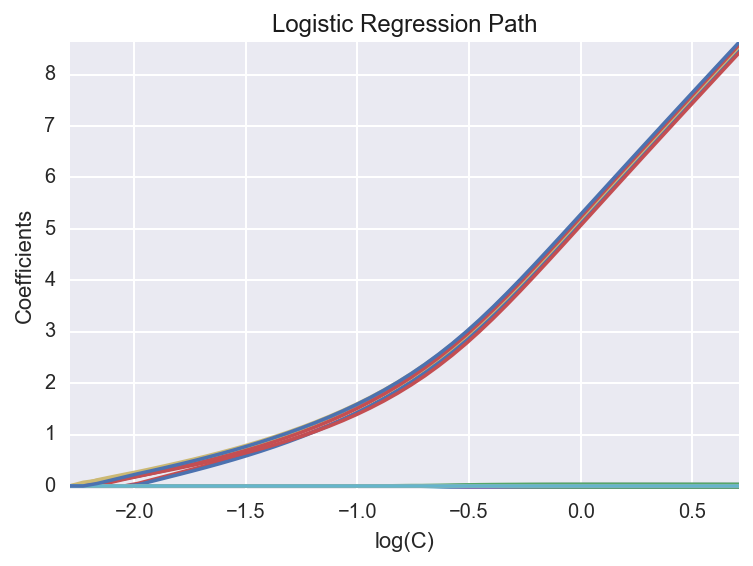

In [474]:

from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn import datasets
from sklearn.svm import l1_min_c

cs = l1_min_c(X_norm, y, loss='log') * np.logspace(0, 3)


print("Computing regularization path ...")
start = datetime.now()
clf = linear_model.LogisticRegression(C=1.0, penalty='l1', tol=1e-6)
coefs_ = []
for c in cs:
    clf.set_params(C=c)
    clf.fit(X_norm, y)
    coefs_.append(clf.coef_.ravel().copy())
print("This took ", datetime.now() - start)

coefs_ = np.array(coefs_)
plt.plot(np.log10(cs), coefs_)
ymin, ymax = plt.ylim()
plt.xlabel('log(C)')
plt.ylabel('Coefficients')
plt.title('Logistic Regression Path')
plt.axis('tight')
plt.show()